# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [39]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_KEY")

## Load Data

In [41]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.dropna()
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [42]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_year = sfo_data.groupby(['year']).mean('housing_units')
housing_units_year.drop(['sale_price_sqr_foot','gross_rent'], axis = 1, inplace = True)
housing_units_year.reindex()
housing_units_year.head()

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348


In [43]:
# Save the dataframe as a csv file
housing_units_year.to_csv('Data/housing_units_year.csv')

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Year', ylabel='Housing units'>

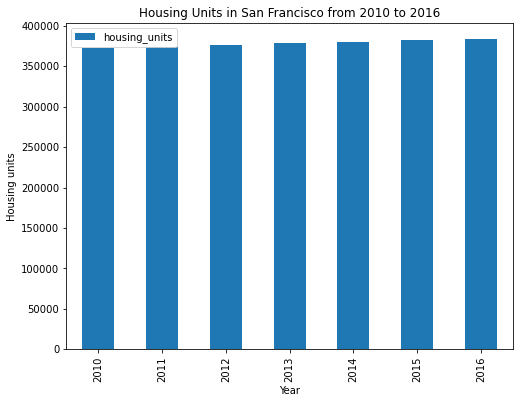

In [44]:
# Use the Pandas plot function to plot the average housing units per year.
housing_units_year.plot.bar(
    xlabel= "Year", 
    ylabel = "Housing units", 
    title = "Housing Units in San Francisco from 2010 to 2016", figsize=(8,6), rot = 90)

<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='Year', ylabel='Housing units'>

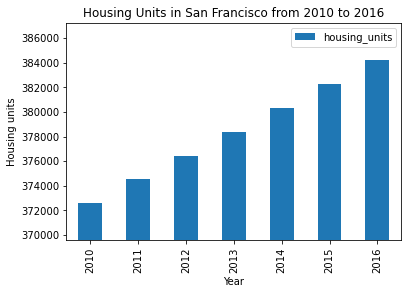

In [45]:
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
max_units_year = max(housing_units_year['housing_units']) + 3000
min_units_year = min(housing_units_year['housing_units']) -3000
housing_units_year.plot.bar(xlabel= "Year", ylabel = "Housing units", ylim=(min_units_year, max_units_year), title = "Housing Units in San Francisco from 2010 to 2016")
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

<AxesSubplot:title={'center':'Average Sale Price per Square Foot by year'}, xlabel='Year', ylabel='Average price per sq foot'>

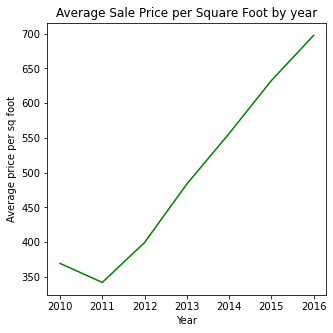

In [46]:
# Individual line charts, one to plot the average sale price per square foot and another for average montly rent
avg_sale_price = sfo_data["sale_price_sqr_foot"].groupby([sfo_data.index]).mean()
avg_sale_price.plot(
    xlabel = 'Year', 
    ylabel= 'Average price per sq foot', 
    color = 'green',
    title="Average Sale Price per Square Foot by year",figsize=(5,5))

<AxesSubplot:title={'center':'Average Gross Rent by year'}, xlabel='Year', ylabel='Average gross rent'>

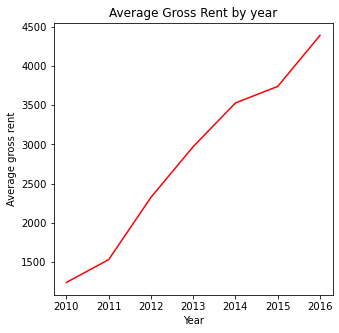

In [47]:
# Individual Line chart for average montly rent
avg_rent = sfo_data["gross_rent"].groupby([sfo_data.index]).mean()
avg_rent.plot(
    xlabel = 'Year', 
    ylabel= 'Average gross rent', 
    color = "red",
    title="Average Gross Rent by year",figsize=(5,5))

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [48]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_neighborhood = sfo_data.groupby([sfo_data.index, 'neighborhood']).mean()
sfo_neighborhood_df = pd.DataFrame(sfo_neighborhood).reset_index()
sfo_neighborhood_df.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [49]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def avg_price_neighborhood(neighborhood):    
    return sfo_neighborhood_df.loc[sfo_neighborhood_df["neighborhood"] == neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        color ="green",
        title="SF Sale per Square foot per Year",
    )
neighborhood_choice =sfo_neighborhood_df["neighborhood"]
interact(avg_price_neighborhood, neighborhood = neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02138')

In [50]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
def avg_rent_neighborhood(neighborhood):    
    return sfo_neighborhood_df.loc[sfo_neighborhood_df['neighborhood'] == neighborhood,:].hvplot.line(
        x="year",
        y="gross_rent",
        color ="red",
        title="SF gross monthly rent",
    )
neighborhood_choice =sfo_neighborhood_df["neighborhood"]
interact(avg_rent_neighborhood, neighborhood = neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02323')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [51]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_neighborhood_top10 = sfo_data.groupby('neighborhood')['sale_price_sqr_foot'].mean().reset_index()
sfo_neighborhood_ten = sfo_neighborhood_top10.sort_values('sale_price_sqr_foot', ascending = False).reset_index()
sfo_neighborhood_10 = sfo_neighborhood_ten.head(10)
sfo_neighborhood_10

,index,neighborhood,sale_price_sqr_foot
0,65,Union Square District,903.993258
1,36,Merced Heights,788.844818
2,38,Miraloma Park,779.810842
3,51,Pacific Heights,689.555817
4,71,Westwood Park,687.087575
5,63,Telegraph Hill,676.506578
6,57,Presidio Heights,675.350212
7,10,Cow Hollow,665.964042
8,56,Potrero Hill,662.013613
9,60,South Beach,650.124479


<AxesSubplot:title={'center':'Top 10 suburbs by price per sqr foot'}, xlabel='Neighborhood', ylabel='Sale_price_sqr_foot'>

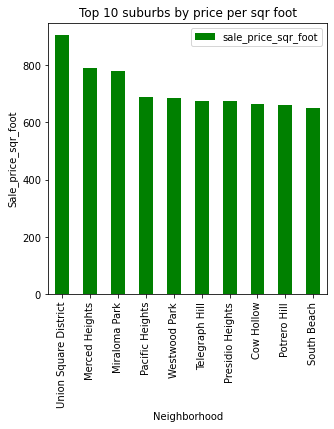

In [52]:
# c
sfo_neighborhood_10.plot.bar(
    x='neighborhood',
    xlabel = 'Neighborhood', 
    y = 'sale_price_sqr_foot',
    ylabel= 'Sale_price_sqr_foot', 
    color = "green",
    title="Top 10 suburbs by price per sqr foot",figsize=(5,5))

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [53]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
def purchase_neighborhood(neighborhood):    
    return sfo_neighborhood_df.loc[sfo_neighborhood_df['neighborhood'] == neighborhood,:].hvplot.bar(
        x = 'year',
        y= ['sale_price_sqr_foot', 'gross_rent'],
        xlabel= 'Year',
        ylabel = 'Dollars',
        title= 'Comparison- SF average monthly rent versus average price per sqr mtr',
        rot = 90
    )
neighborhood_choice =sfo_neighborhood_df["neighborhood"]
interact(purchase_neighborhood, neighborhood = neighborhood_choice)


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Bars, name='interactive02508')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [54]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
location_data = pd.read_csv(file_path, index_col= "Neighborhood")
location_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [55]:
# Calculate the mean values for each neighborhood
sf_avg_all = sfo_data.groupby(['neighborhood']).mean()
sf_avg_all

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [56]:
# Join the average values with the neighborhood locations
loc_and_avg_df = pd.concat([location_data, sf_avg_all], axis = "columns", join = "inner")
loc_and_avg_df.head()

,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

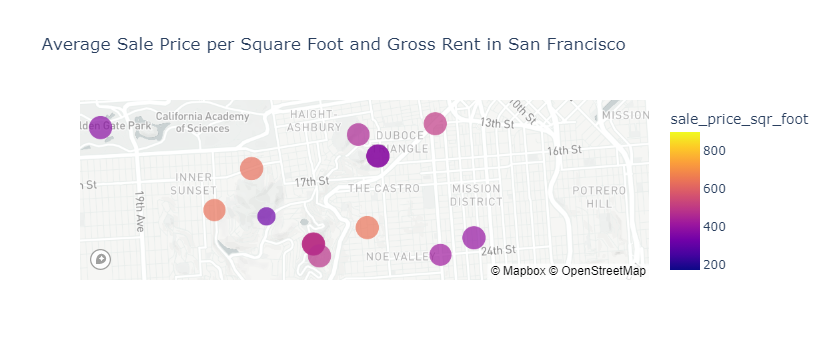

In [57]:
# Set the mapbox access token
load_dotenv()
map_box_api = os.getenv("MAPBOX_KEY")
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    loc_and_avg_df,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="sale_price_sqr_foot",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
    zoom = 12,
    width = 800
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [69]:
# Fetch the data from all expensive neighborhoods per year 
sfo_expensive = sfo_data[sfo_data['neighborhood'].isin(sfo_neighborhood_10['neighborhood'])]
sfo_expensive.dropna()
sfo_expensive.tail(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2015,Presidio Heights,NaN,382295,3739
2015,Telegraph Hill,996.990220,382295,3739
2015,Union Square District,2258.702832,382295,3739
2016,Cow Hollow,1059.065602,384242,4390
2016,Merced Heights,1416.666667,384242,4390
2016,Pacific Heights,996.389364,384242,4390
2016,Potrero Hill,707.651609,384242,4390
2016,Presidio Heights,1465.968586,384242,4390
2016,Telegraph Hill,903.049771,384242,4390


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


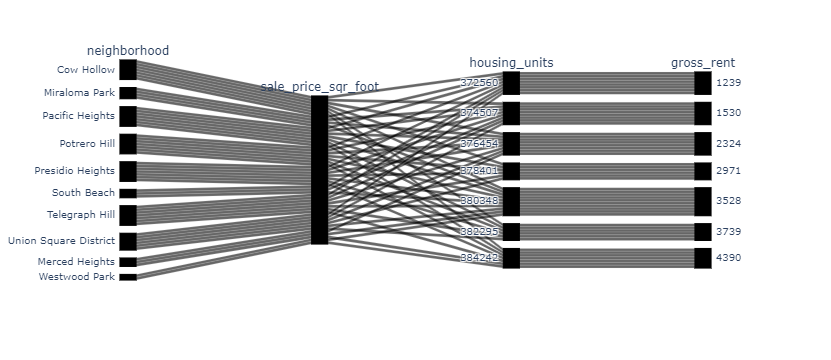

In [90]:
# Parallel Categories Plot
px.parallel_categories(sfo_expensive, 
                       color="sale_price_sqr_foot", 
                       color_continuous_scale=px.colors.sequential.Inferno,width=1200)

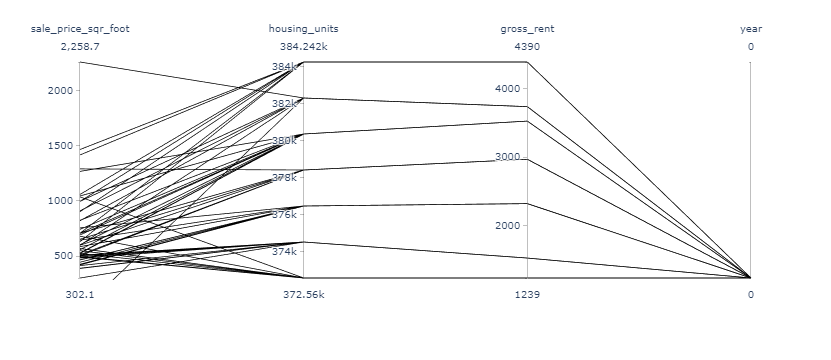

In [91]:
# Parallel Coordinates Plot
px.parallel_coordinates(sfo_expensive, color= sfo_expensive.index)  


### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

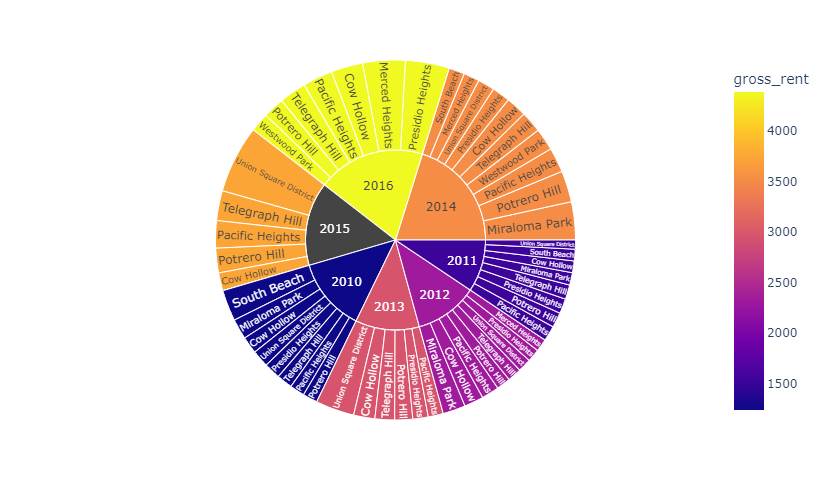

In [92]:
fig = px.sunburst(sfo_expensive, path=[
    sfo_expensive.index, 'neighborhood'], values='sale_price_sqr_foot', color = 'gross_rent', width=500, height=500)           
fig.show()


In [ ]:
#The end